# Project 1
### Run the embeddings of Eq. (2.6) that are specified in the appendix, and compare them to the ground truth simulation

### Remember to use conda environment qutip-env2

https://mkalpakis.net/files/papers/Expanding%20Hardware-Efficiently%20Manipulable%20Hilbert%20Space%20via%20Hamiltonian%20Embedding.pdf

In [1]:
# use conda environment qutip-env2
from hamiltonianEmbedding import * # this is my function library

In [2]:
# equation 2.6 from the paper
A:np.ndarray = np.array(
    [
        [-1, 1, 0, 0, 0],
        [1, -2, 1, 0, 0],
        [0, 1, -2, 1, 0],
        [0, 0, 1, -2, 1],
        [0, 0, 0, 1, -1],
    ]
)

Verifying that $(Q_A)|_S = A$ for each embedding, after I wrote the new $\textrm{restrictToS()}$ function.

## Verifying the Unary Embedding [not working]

### creating the basis matrix for the unary embedding

In [ ]:
# creating the basis matrix for the unary embedding

## after most recent email, trying reversing the bitstring order and seeing what happens
## that worked

bitstrings = get_bitstrings_1d(5, "unary")
# bitstrings = ["".join(reversed(bitstring)) for bitstring in bitstrings] # this fixes the diagonal entries

uks = [qutip.tensor(qutip.basis(2, 0) if s == "0" else qutip.basis(2, 1) for s in bitstring) for bitstring in bitstrings]

sBasisMatrix = np.column_stack([u.full() for u in uks])
print(bitstrings)
print(sBasisMatrix)

['0000', '1000', '1100', '1110', '1111']
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


### discovered that the diagonal entry calculation is currently wrong

In [7]:
# discovered that the diagonal entry calculation is currently wrong

Unary = UnaryEmbedding(A)

## reversing the bitstrings fixed everything in the test
## just need to verify this for the actual functions that I wrote

n = 5
Q1 = (A[0, 0] * sub_i(I, 1, n-1) + sum((A[j-1][j-1] - A[j-2][j-2]) * sub_i(n_hat, j-1, n-1)
									for j in range(2, n+1))) 

Q2 = sub_i(X, 1, 4) + sub_i(X, 2, 4) + sub_i(X, 3, 4) + sub_i(X, 4, 4)

Q_A = Q1 + Q2

# the embedding works
print(sBasisMatrix.transpose().conj() @ Q_A.full() @ sBasisMatrix == A)
print(sBasisMatrix.transpose().conj() @ Q_A.full() @ sBasisMatrix)

for uk in uks:
	print(uk.dag() @ Q1 @ uk) # this is the wrong output ## want {-1, -2, -2, -2, -1}, I think

## now will verify that it still works using the class functions that I made

Q_A2 = Unary.Q_a().full()
print(type(Q_A2))
A_maybe = (Unary.restrictToS(Q_A2))
print(A == A_maybe)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[-1.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j -2.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j -2.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j -2.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j -1.+0.j]]
(-1+0j)
(-2+0j)
(-2+0j)
(-2+0j)
(-1+0j)
<class 'numpy.ndarray'>
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [5]:
print(qutip.tensor([qutip.basis(2, 0) for _ in range(2)]))

# for a 4 qubit system
print("n_4 - n_1")
print(-1 * sub_i(n_hat, 1, 4) + sub_i(n_hat, 4, 4))

# casi wanted to see the actual things
# i = 1, 2, 3, 4
for index, uk in enumerate(uks):
	print(uk)
	print(sub_i(n_hat, index+1, 4)) if index+1 < 5 else None

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
n_4 - n_1
Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0

### trying to figure out what is wrong with the diagonal entry calculations [still dont know]

In [27]:
# trying to figure out what is wrong with the diagonal entry calculation
def eqB9(M):
	for uk in uks:
		print(uk.dag() @ M @ uk)
	print("")

n = 5

alpha = [None, -1, -2, -2, -2, -1]
# sanity check on the diagonal entries of A
sanityCheck = lambda k: alpha[1] + sum((alpha[j] - alpha[j-1]) for j in range(2, k+1))

# k = 1, 2, 3, 4, 5
for k in range(1, 6):
	print(f"sanity check: {sanityCheck(k)}")

# according to proposition 12
Q1_def = (A[0][0] * sub_i(I, 1, n-1)) + sum((A[j-1][j-1] - A[j-2][j-2]) * sub_i(n_hat, j-1, n-1)
											for j in range(2, n+1)) # sum 2 <= j <= n

# one step into the simplification provided in B9 (the one that the paper skips)
# the A[0][0] part should be added at the end since its no longer a matrix term
Q1_onestep = sum((A[j-1][j-1] - A[j-2][j-2]) * sub_i(n_hat, j-1, n-1)
				 for j in range(2, n+1))

# so that alpha[i] lines up with math starting at 1 indexing
Q1_again = (alpha[1] * sub_i(I, n-1, n-1) + sum((alpha[j] - alpha[j-1]) * sub_i(n_hat, j-1, n-1)
											  for j in range(2, n+1)))


print("Q1 again")
eqB9(Q1_again)

# print("Q1_def")
# eqB9(Q1_def)

# print("Q1_onestep minus A_11")
# # this still yields -1, 0, 0, 0, -1
# eqB9(Q1_onestep)

sanity check: -1
sanity check: -2
sanity check: -2
sanity check: -2
sanity check: -1
Q1 again
(-1+0j)
(-2+0j)
(-2+0j)
(-2+0j)
(-1+0j)



## Plotting the embedding methods for simulation error
Plotting $||e^{-i\hat{H}t}||$ and $||e^{-iAt}||$, where $|| \cdot ||$ is the frobenius norm (aka fidelity)

Unary results are currently wrong, since the computation of the diagonal embedding entries is incorrect (as above)

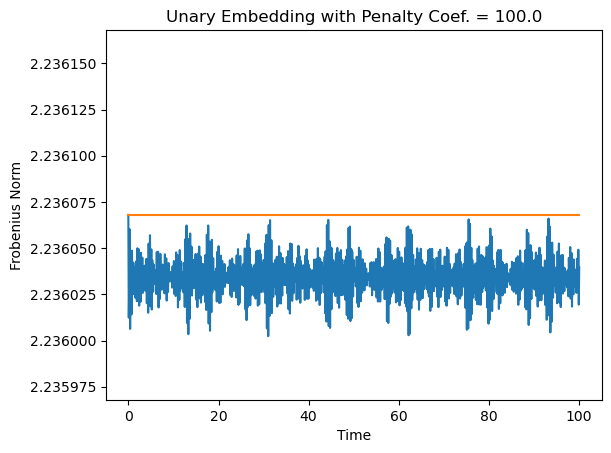

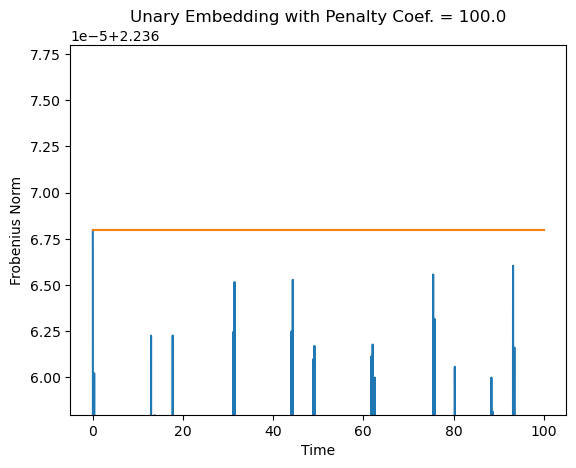

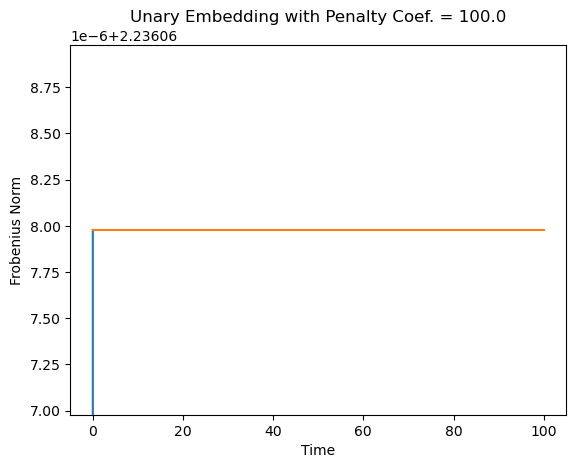

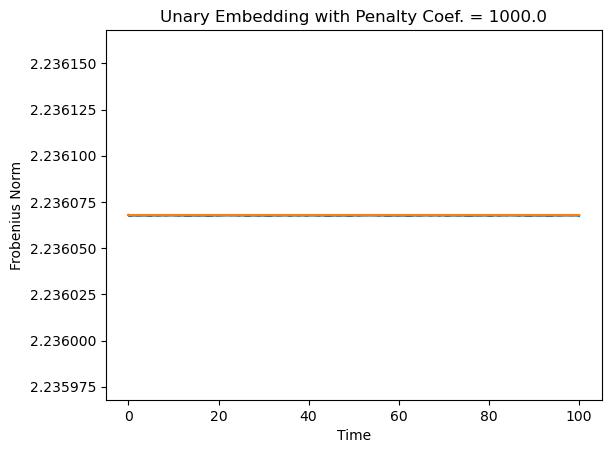

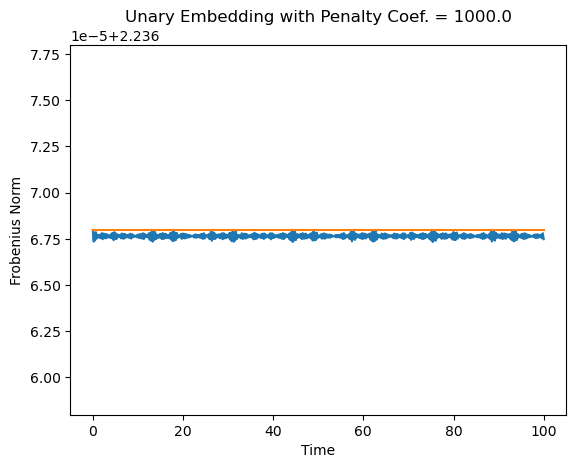

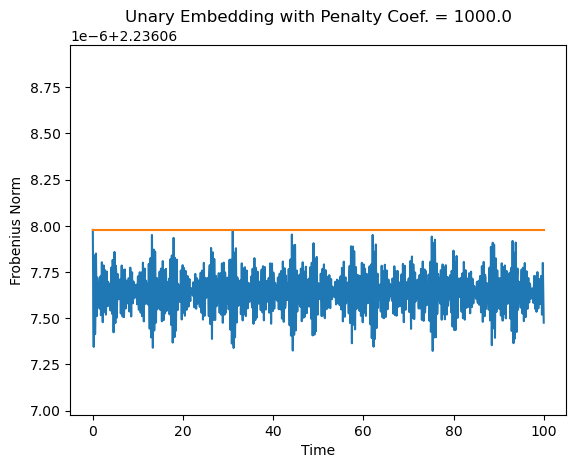

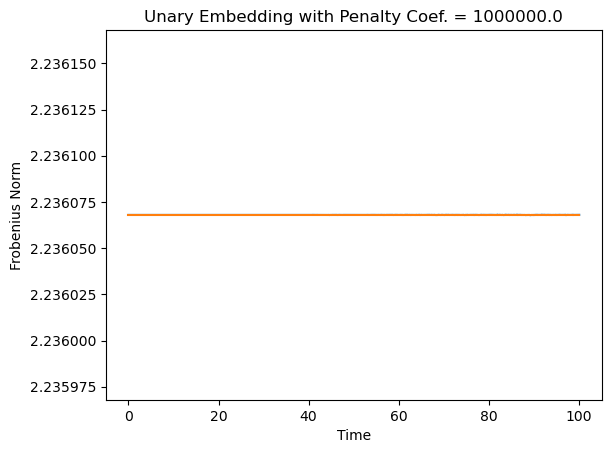

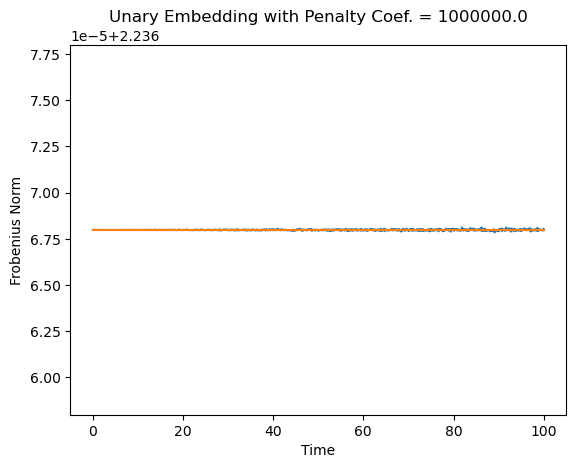

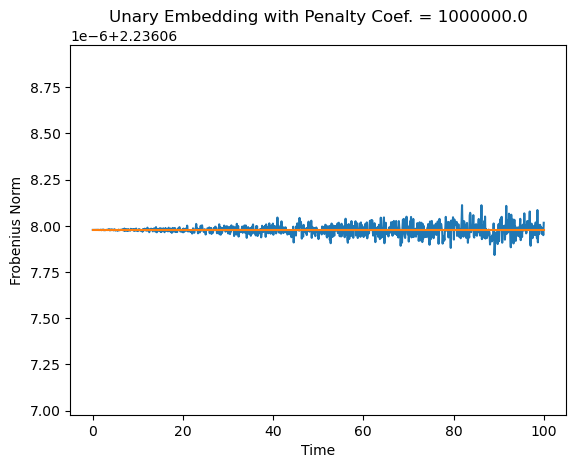

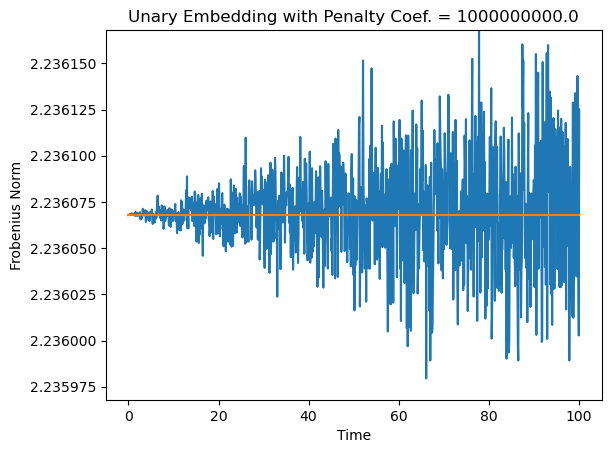

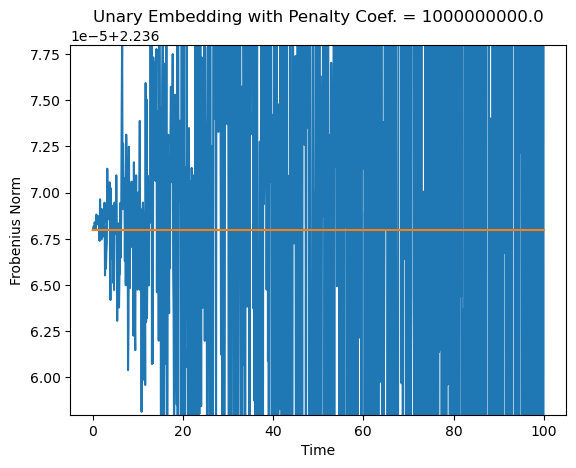

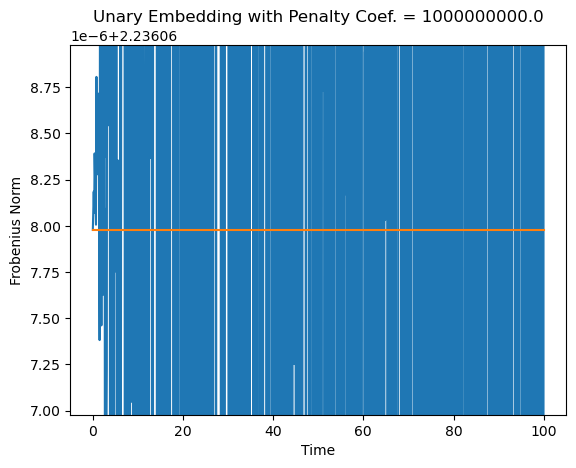

In [3]:
U = UnaryEmbedding(A)
gs = [1e2, 1e3, 1e6, 1e9]
times = np.linspace(0, 100, 1000)

for g in gs:
	results = U.genEmbedOverTime(g, times)
	frobResults = U.genFrobAlone(results)

	center = 2.23606797749979
	bounds = [1e-4, 1e-5, 1e-6]
	for bound in bounds:
		U.plotNormSeperate(frobResults, "Time", ham_type="Unary", pen_coef=g, normType="Frobenius", axLimits=[None, None, center - bound, center + bound], saveTopDirName="plots/unary")

### Antiferromagnetic Embedding

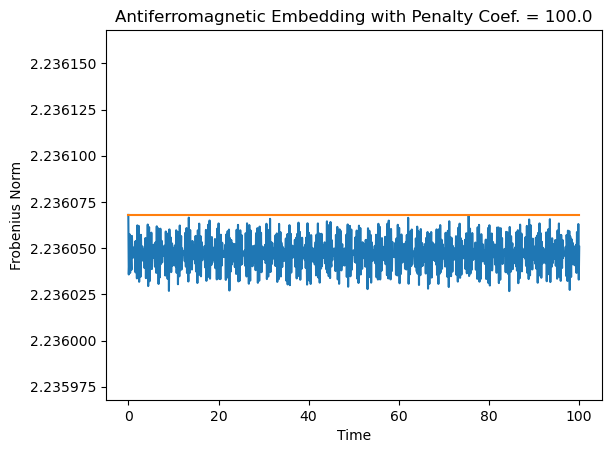

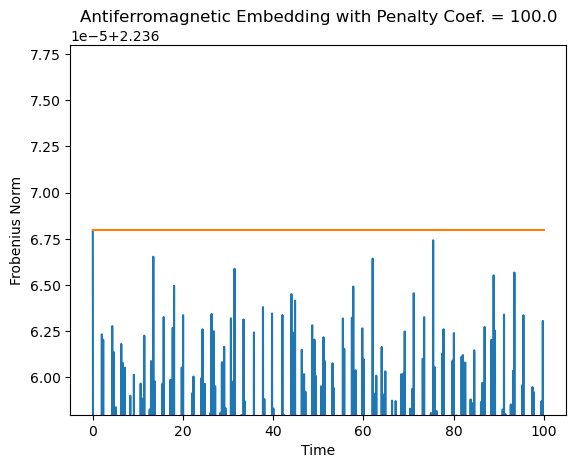

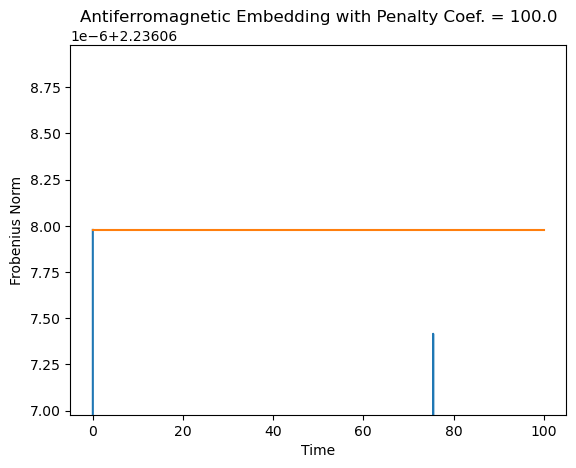

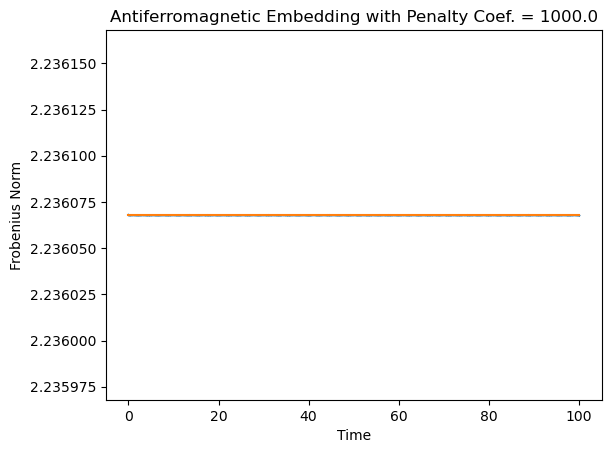

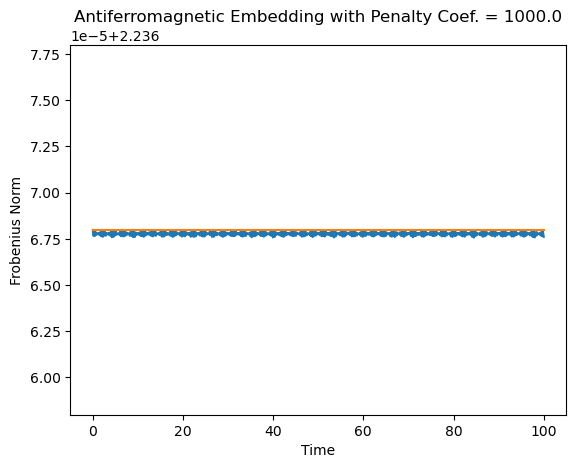

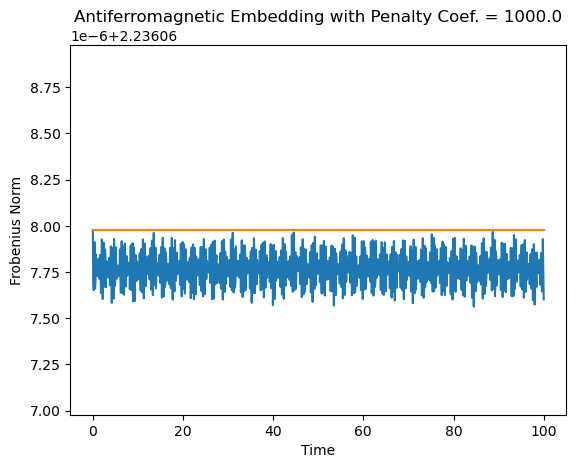

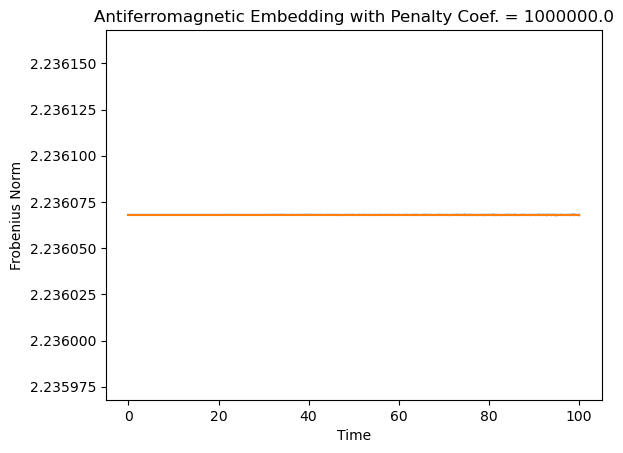

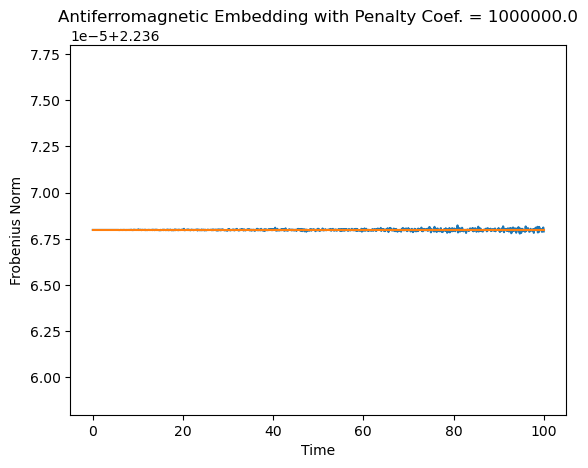

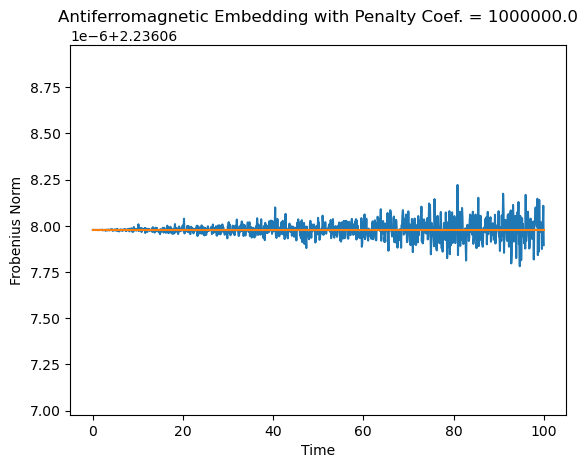

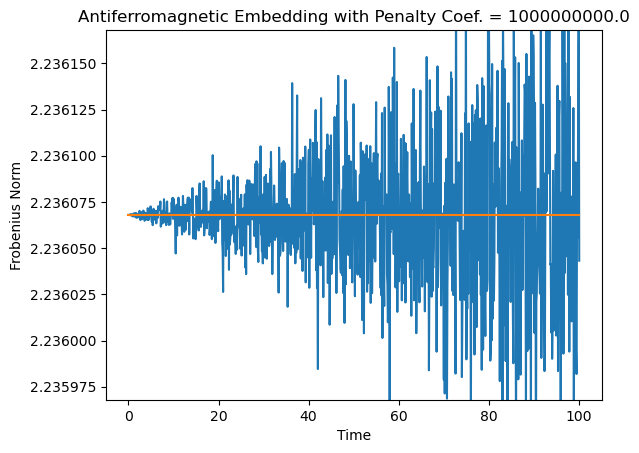

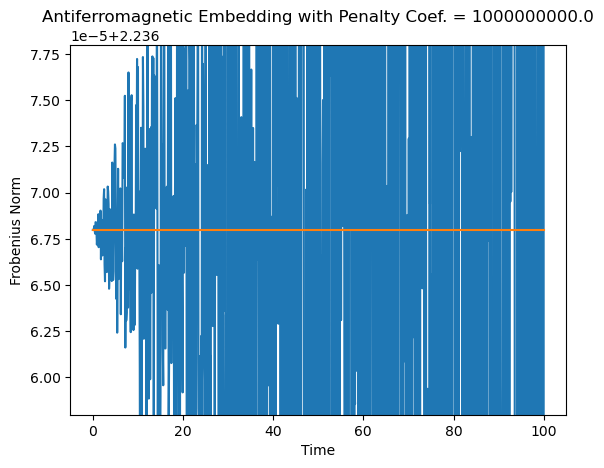

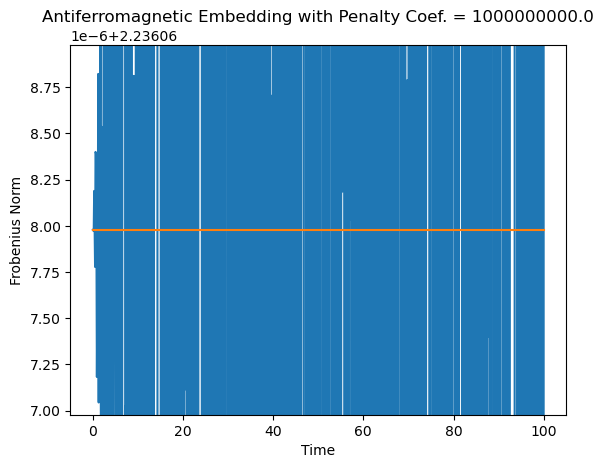

In [8]:
U = AntiferromagneticEmbedding(A)

# plotting over time
gs = [1e2, 1e3, 1e6, 1e9]
times = np.linspace(0, 100, 1000)

for g in gs:
	results = U.genEmbedOverTime(g, times)
	## spectralResults = U.genSpectralBetween(results)
	# spectralResults = U.genSpectralAlone(results)
	## frobResults = U.genFrobBetween(results)
	frobResults = U.genFrobAlone(results)

	## U.plotNormBetween(spectralResults, "Time", ham_type="Antiferromagnetic", pen_coef=g, normType="Spectral")	
	## U.plotNormBetween(frobResults, "Time", ham_type="Antiferromagnetic", pen_coef=g, normType="Frobenius")

	# U.plotNormSeperate(spectralResults, "Time", ham_type="Antiferromagnetic", pen_coef=g, normType="Spectral")	
	center = 2.23606797749979
	bounds = [1e-4, 1e-5, 1e-6]
	for bound in bounds:
		U.plotNormSeperate(frobResults, "Time", ham_type="Antiferromagnetic", pen_coef=g, normType="Frobenius", axLimits=(None, None, center - bound, center + bound), saveTopDirName="plots/antiferromagnetic")


## this cell is interesting, as we can see the results if we have a target time, and plot over values of the penalty coefficient, which is interesting to pick a, good pen coef, but I don't think this is what I want to do right now, thus, all the code below will be commented out

In [9]:
## this cell is interesting, as we can see the results if we have a target time
## and plot over values of the penalty coefficient, which is interesting to pick a
## good pen coef, but I don't think this is what I want to do right now
## thus, all the code below will be commented out

# U = AntiferromagneticEmbedding(A)

# ## plotting over g
# ## probably not going to use this
# times = [10, 50, 100]
# times = [10000]
# gs = np.linspace(1e3, 1e4, int(1e3))

# for time in times:
# 	results = U.genEmbedOverG(gs, time)
# 	spectralResultsAlone = U.genSpectralAlone(results)
# 	frobResultsAlone = U.genFrobAlone(results)

# 	center = 2.236067977500489
# 	bound = 1e-5
# 	# U.plotNormSeperate(spectralResultsAlone, "Pen. Coef", ham_type="Antiferromagnetic", pen_coef="Time", normType="Spectral", axLimits=(None, None, 1-1e-4, 1+1e-6))	
# 	U.plotNormSeperate(frobResultsAlone, "Pen. Coef", ham_type="Antiferromagnetic", pen_coef="Time", normType="Frobenius", axLimits=(None, None, center - bound, center + bound))


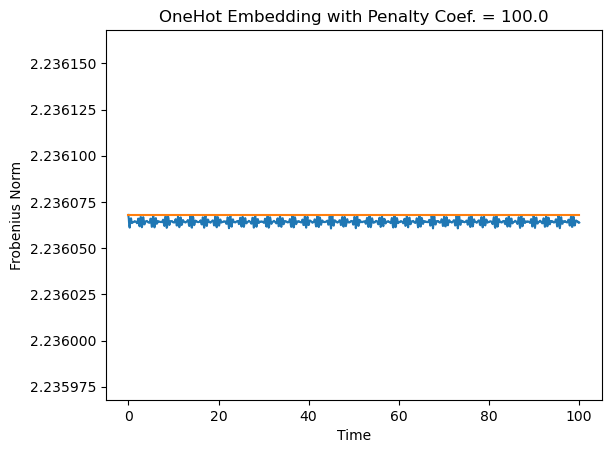

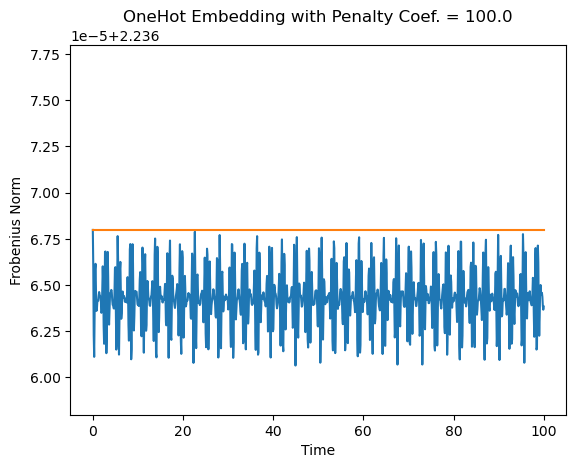

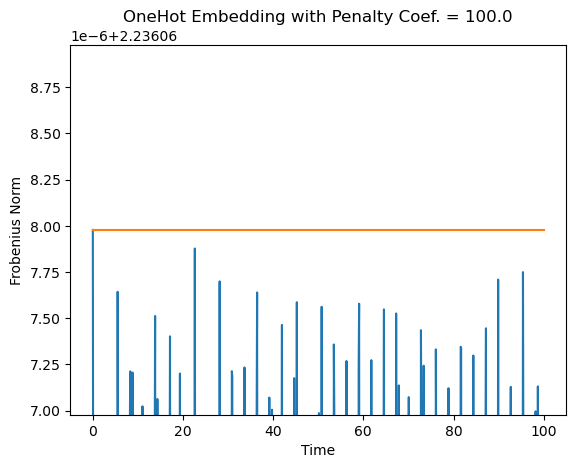

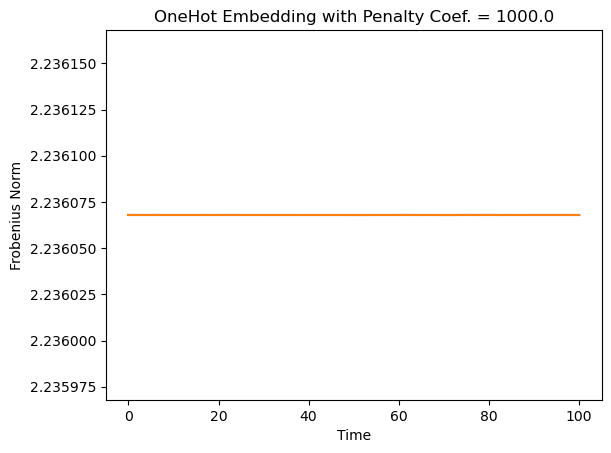

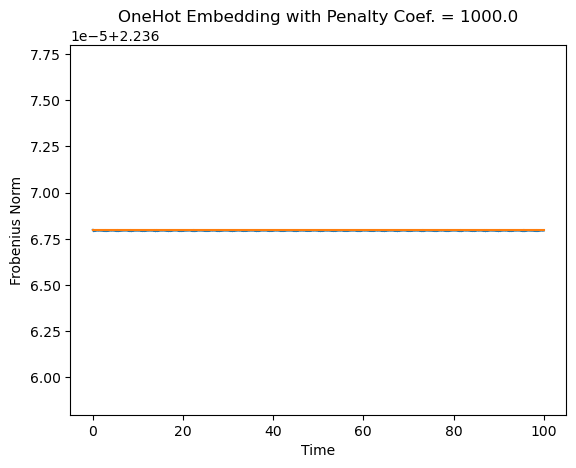

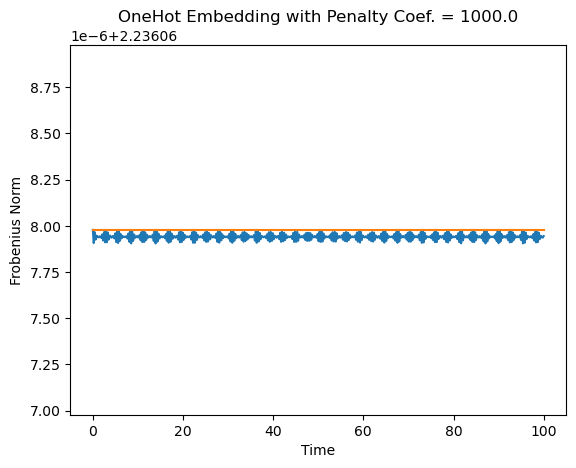

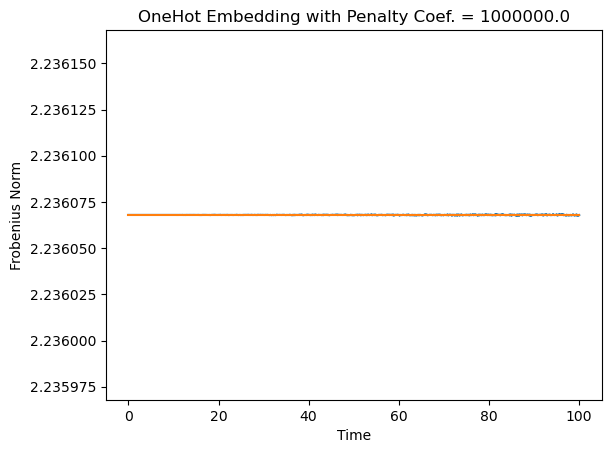

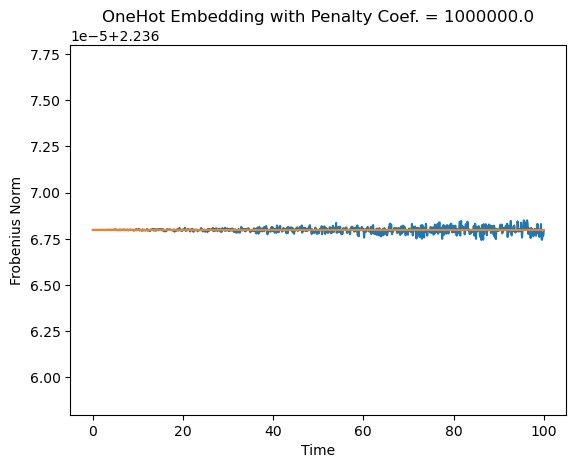

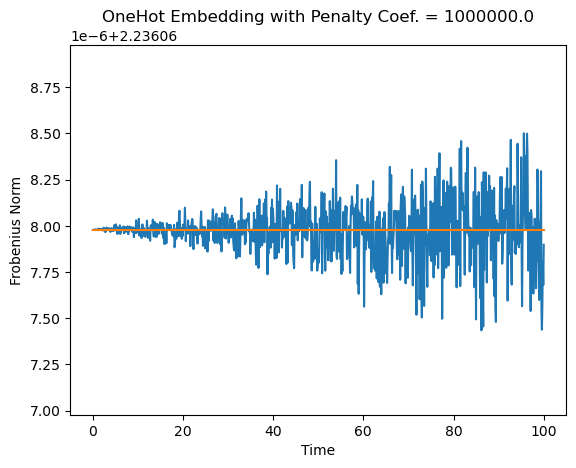

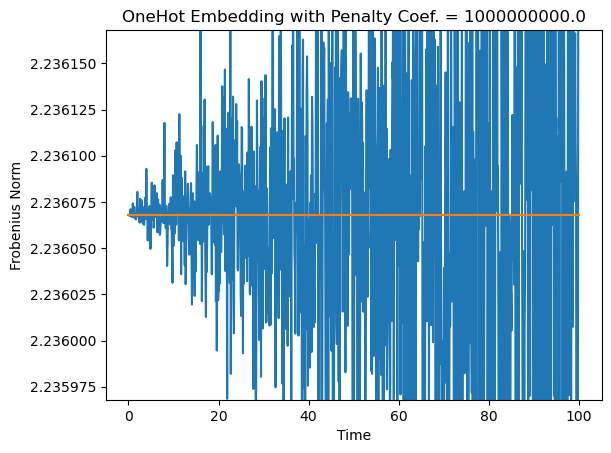

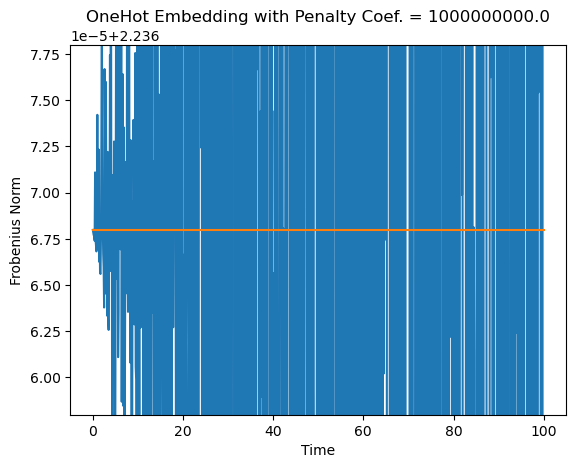

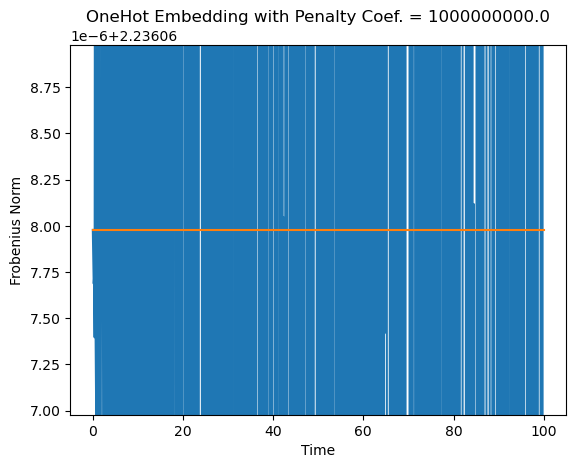

In [10]:
U = OneHotEmbedding(A)

gs = [1e2, 1e3, 1e6, 1e9]
times = np.linspace(0, 100, 1000)

for g in gs:
	results = U.genEmbedOverTime(g, times)
	frobResults = U.genFrobAlone(results)

	center = 2.23606797749979
	bounds = [1e-4, 1e-5, 1e-6]
	for bound in bounds:
		U.plotNormSeperate(frobResults, "Time", ham_type="OneHot", pen_coef=g, normType="Frobenius", axLimits=[None, None, center - bound, center + bound], saveTopDirName="plots/onehot")

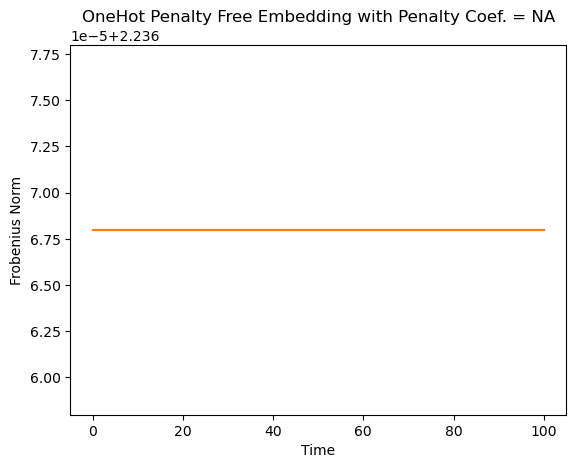

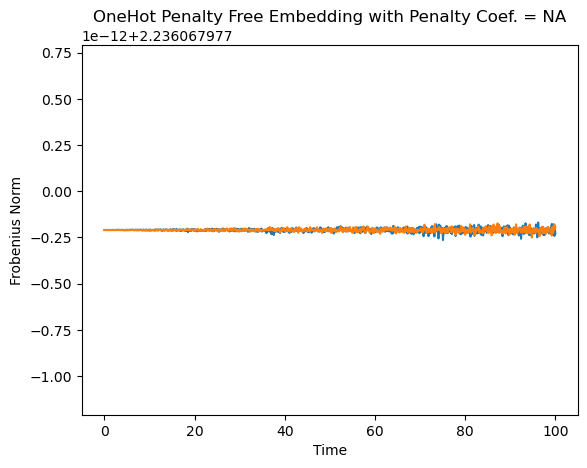

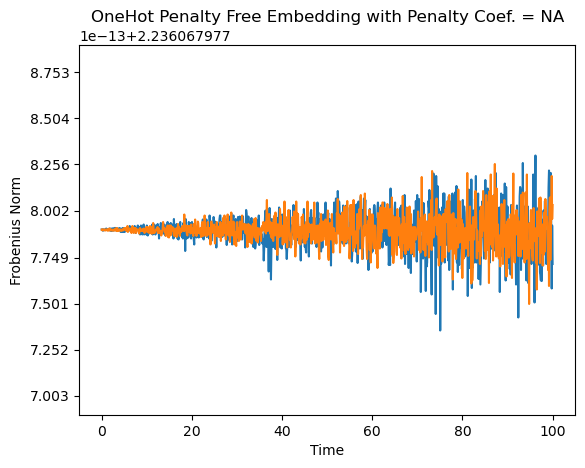

In [14]:
U = OneHotPenaltyFreeEmbedding(A)
gs = [1e2, 1e3, 1e6, 1e9]
times = np.linspace(0, 100, 1000)

results = U.genEmbedOverTime(0, times)

frobResults = U.genFrobAlone(results)


center = 2.23606797749979
bounds = [1e-5, 1e-12, 1e-13]

for bound in bounds:
	U.plotNormSeperate(frobResults, "Time", ham_type="OneHot Penalty Free", pen_coef="NA", normType="Frobenius", axLimits=(None, None, center - bound, center + bound), saveTopDirName="plots/onehotpenaltyfree")